<a href="https://colab.research.google.com/github/huunghia160799/CS224W-Stanford/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install snap-stanford

Erdos-Renyi model
The number of nodes: 5242
The number of edges: 14478


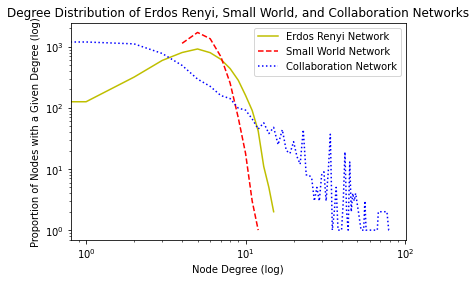

Clustering Coefficient for Erdos Renyi Network: 0.001728
Clustering Coefficient for Small World Network: 0.284000
Clustering Coefficient for Collaboration Network: 0.529636


In [0]:
################################################################################
# CS 224W (Fall 2019) - HW1
# Starter code for Question 1
# Last Updated: Sep 25, 2019
################################################################################

import snap
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

# Setup
erdosRenyi = None
smallWorld = None
collabNet = None


# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.PUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)
    
    for e in range(E):
        Graph.AddEdge(randint(0, N), randint(0, N))
    
    print("Erdos-Renyi model")
    print("The number of nodes:", sum(1 for _ in Graph.Nodes()))
    print("The number of edges:", sum(1 for i in Graph.Edges()))

    ############################################################################
    return Graph


def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.PUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)

    for i in range(N):
        Graph.AddEdge(i, (i + 1) % N)
    ############################################################################
    return Graph


def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    # TODO: Your code here!
    for i in range(0, N):
        Graph.AddEdge(i, (i + 2) % N)
    ############################################################################
    return Graph


def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    # TODO: Your code here!
    N = sum(1 for _ in Graph.Nodes())
    visited = [[False for i in range (N)] for j in range(N)]

    for edge in Graph.Edges():
        u, v = edge.GetSrcNId(), edge.GetDstNId()
        visited[u][v] = True
        visited[u][u] = True
    count_generated = 0
    while count_generated < 4000:
        u, v = randint(0, N), randint(0, N)
        if not visited[u][v]:
            Graph.AddEdge(u, v)
            visited[u][v] = True
            visited[v][u] = True
            count_generated += 1

    ############################################################################
    return Graph


def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph


def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed

    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    path = "/content/drive/My Drive/CS224W Stanford: Machine Learning in Graphs/hw1/ca-GrQc.txt"
    Graph = snap.LoadEdgeList(snap.PUNGraph, path)
    snap.DelSelfEdges(Graph)

    ############################################################################
    return Graph


def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X, Y = [], []
    DegToCntV = snap.TIntPrV()
    snap.GetInDegCnt(Graph, DegToCntV)
    for item in DegToCntV:
        X.append(item.GetVal1())
        Y.append(item.GetVal2())
    ############################################################################
    return X, Y


def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()


# Execute code for Q1.1
Q1_1()


# Problem 1.2 - Clustering Coefficient

def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: local clustering coeffient of Node
    """
    ############################################################################
    # TODO: Your code here!
    C = 0.0
    k = Node.GetDeg()
    
    neighbors = set()
    for i in range(k):
        neighbor = Node.GetNbrNId(i)
        neighbors.add(neighbor)
    
    if (k >= 2):
        e = 0
        for edge in Graph.Edges():
            if edge.GetSrcNId() in neighbors and edge.GetDstNId() in neighbors:
                e += 1
        C = 2 * e / (k * (k - 1))
    else:
        C = 0
    ############################################################################
    return C

def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: clustering coeffient of Graph
    """
    ############################################################################
    # TODO: Your code here! If you filled out calcClusteringCoefficientSingleNode,
    #       you'll probably want to call it in a loop here
    C = 0.0

    V = 0
    for node in Graph.Nodes():
        C += calcClusteringCoefficientSingleNode(node, Graph)
        V += 1
    C /= V

    ############################################################################
    return C

def Q1_2():
    """
    Code for Q1.2
    """
    C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = calcClusteringCoefficient(smallWorld)
    C_collabNet = calcClusteringCoefficient(collabNet)

    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)


# Execute code for Q1.2
Q1_2()

# Question 2

In [0]:
import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(X, Y):
    if norm(Y) == 0 or norm(X) == 0: return 0
    return dot(X, Y) / (norm(X) * norm(Y))

def compute_number_edges_egonet(Id, graph, neighbors):
    result = 0
    for u in neighbors:
        for key, val in graph[Id][u].items():
            if key in neighbors:
                result += 1
    return result

def compute_number_bridges_egonet(Id, graph, neighbors):
    result = 0
    for u in neighbors:
        for key, val in graph[Id][u].items():
            if key not in neighbors:
                result += 1
    return result

def compute_feature_vector(Id, graph):
    feature_vector = []
    neighbors = graph[Id]
    
    feature_vector.append(len(neighbors.keys()))

    feature_vector.append(compute_number_edges_egonet(Id, graph, neighbors.keys()))

    feature_vector.append(compute_number_bridges_egonet(Id, graph, neighbors.keys()))

    return np.array(feature_vector, dtype=float)

path = '/content/drive/My Drive/CS224W Stanford: Machine Learning in Graphs/hw1/netscience.gml'
Graph = nx.read_gml(path, 'id')

feature_vectors = {}
for node_id in Graph._adj:
    feature_vectors[node_id] = compute_feature_vector(node_id, Graph._adj)

lst = []
for node_id in Graph._adj:
    if node_id == 9:
        print(feature_vectors[node_id])
        continue
    # print(feature_vectors[node_id])
    sim_score = cosine_similarity(feature_vectors[node_id], feature_vectors[9])
    # print(sim_score)
    lst.append((sim_score, node_id))

print(sorted(lst, reverse=True)[:5])

[6. 0. 6.]
[(1.0000000000000002, 1578), (1.0000000000000002, 1577), (1.0000000000000002, 1576), (1.0000000000000002, 1575), (1.0000000000000002, 1567)]


In [0]:
import copy

def compute_recursive_features(graph, feature_vectors, k=2):
    for _ in range(k):
        old_feature_vectors = copy.deepcopy(feature_vectors)
        for node_id, vector in old_feature_vectors.items():
            neighbors = graph[node_id]
            neighbor_feature_matrix = []
            for neighbor in neighbors.keys():
                neighbor_feature_matrix.append(old_feature_vectors[neighbor].tolist())
            neighbor_feature_matrix = np.array(neighbor_feature_matrix)
            mean_vector = np.mean(neighbor_feature_matrix, axis=0)
            sum_vector = np.sum(neighbor_feature_matrix, axis=0)
            # print()
            # print(mean_vector.shape)
            # print(sum_vector.shape)
            # print(feature_vectors[node_id].shape)
            feature_vectors[node_id] = np.hstack((feature_vectors[node_id], mean_vector, sum_vector))
            # print(feature_vectors[node_id].shape)

compute_recursive_features(Graph._adj, feature_vectors)
lst = []
for node_id in Graph._adj:
    if node_id == 9:
        print(feature_vectors[node_id])
        continue
    # print(feature_vectors[node_id])
    # print(feature_vectors[node_id].shape)
    if feature_vectors[node_id].shape[0] == 27:
        sim_score = cosine_similarity(feature_vectors[node_id], feature_vectors[9])
    else:
        sim_score = 0
    # print(sim_score)
    lst.append((sim_score, node_id))

print(sorted(lst, reverse=True)[:5])
                

[ 6.          0.          6.          2.5         0.          2.5
 15.          0.         15.          2.5         0.          2.5
  4.31944444  0.          4.31944444 10.16666667  0.         10.16666667
 15.          0.         15.         25.91666667  0.         25.91666667
 61.          0.         61.        ]
[(0.9999831049896862, 973), (0.998076549987172, 275), (0.998076549987172, 189), (0.9980725467891379, 496), (0.9978720932380629, 244)]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


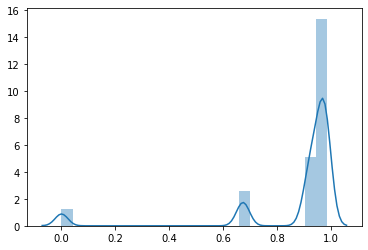

In [0]:
import pandas as pd
import seaborn as sns

map_score_to_frequency = {}
for score, node_id in lst:
    if score in map_score_to_frequency:
        map_score_to_frequency[score] += 1
    else:
        map_score_to_frequency[score] = 1

map_frequency_to_score = {}
for score, frequency in map_score_to_frequency.items():
    map_frequency_to_score[frequency] = score

df = pd.DataFrame.from_dict(map_frequency_to_score, orient="index")
_ = sns.distplot(df)